In [22]:
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('predictions.csv')
df

,id,tweet,true_label,bert_label,gpt_label
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,NOT,OFF
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT,NOT
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT,NOT
3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT,NOT
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT,NOT
...,...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,NOT,NOT
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,NOT,NOT
857,67018,3 people just unfollowed me for talking about ...,OFF,OFF,OFF
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,OFF,NOT


In [11]:
le = LabelEncoder()
y_true = le.fit_transform(df.true_label.values)

In [28]:
X = df['tweet'].values
y = y_true
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
y_pred_dummy = dummy_clf.predict(X)

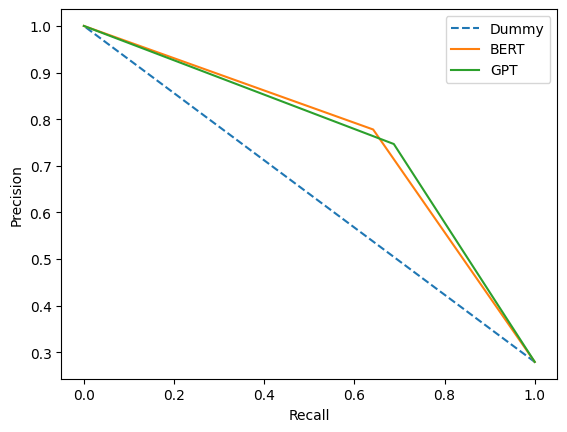

In [32]:
# TO_DO: add other models
columns = ['bert_label', 'gpt_label']
model_names = ['BERT', 'GPT']

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_dummy)
plt.plot(recall, precision, label='Dummy', linestyle='dashed')

for i in range(len(columns)):
    y_pred = le.fit_transform(df[columns[i]].values)
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    plt.plot(recall, precision, label=model_names[i])
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()